In [29]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from random import randint

In [80]:
# read in diseaseome dataset
df = pd.read_csv("Diseaseome.csv",sep=',')

# get a unique list of classes
df_class = list(df["Class"].drop_duplicates())
classes = {}
colors = []
c = 0
for i in df_class:
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    classes[i] = c
    c = c+1
Z_gd = []
Z_c = []

G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['Disorder name'], Type='disease', Class= row['Class'])
    Z_gd.append(1)
    for i in row['Gene symbols'].split(", "):
        #if hasnt been added already
        if not G.has_node(i):
            G.add_node(i,Type='gene')
            Z_gd.append(0)
        G.add_edge(row['Disorder name'], i)
        

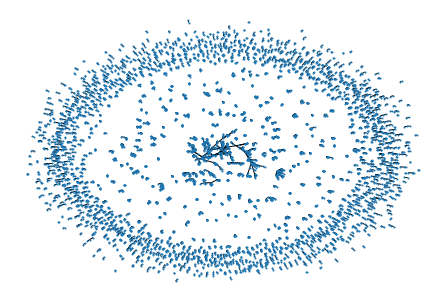

In [22]:
nx.draw_spring(G, with_labels=False, node_size = 1) # draw it pretty
plt.show()

In [100]:
def seperate_out_type(Go, Type):
    G_new = nx.Graph()
    
    for i in Go.nodes(): #create edge between i and p, where p is the nodes that i -> reaction -> p
        if Go.node[i]['Type'] == Type:
            G_new.add_node(i)
            nieghbors = list(Go.neighbors(i))
            for neighbor in nieghbors:
                second_neighbors = list(Go.neighbors(neighbor))
                for second_neighbor in second_neighbors:
                    Go.add_edge(i, second_neighbor, weight = 2)
#                     if i != second_neighbor:
#                         if not Go.has_edge(i,second_neighbor) and not Go.has_edge(i,second_neighbor):
#                             Go.add_edge(i, second_neighbor, weight = 1)
#                         else:
# #                             data = Go[i][second_neighbor]['weight']
#                             Go.add_edge(i, second_neighbor, weight = 2)
                            
    
    return G_new
    

In [101]:
def plotDegsCCDF(degrees):
    # tabulate and display the CCDF Pr(K>=k)
    kmax    = 0
    kis     = []
    for _,ki in degrees:
        kis.append(ki)
        if ki > kmax: kmax = ki

    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

def calculate_MeanGeodesic(Go):
    n = Go.number_of_nodes()#function for number of nodes
    m = Go.size() #function for number of edges

    dij = dict(nx.all_pairs_shortest_path_length(Go)) # APSP on G, store as a dictionary (tricky :)
    mean_geo_path_per_Node = [] # store average path length from any given nodes
    for i in dij.values(): #iterate through each dict of shortest pathes per node
        node = []
        for x in i.values(): #iterate through shortest pathes for each node
            if x != 0: # if path length doesn't equal zero then append to shortest pathes
                node.append(x)
        if len(node)!=0: #if node has any nodes attached then find the mean shortest path and add to list of all nodes
            mean_geo_path_per_Node.append(np.mean(node))
    ellmean = np.mean(mean_geo_path_per_Node)#add mean of graph to ellms array
    return ellmean

def summarystats(Go):
    n = Go.number_of_nodes()#function for number of nodes
    m = Go.size() #function for number of edges
    kmean = m*2/n #mean of in directed degree is edges/number of nodes
    ellmean = calculate_MeanGeodesic(Go)
    C = nx.transitivity(Go)# C 

    print(f'number of nodes, n  = {n}')
    print(f'number of edges, m  = {m}')
    print(f'mean degree,    <k> = %5.2f' % kmean)
    print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
    print(f'clustering coefficient, C     = %5.2f' % C)

In [102]:
G_disease = seperate_out_type(G,'disease')
G_gene = seperate_out_type(G,'gene')

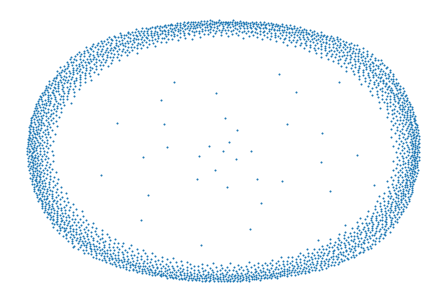

In [103]:
nx.draw_spring(G_disease, with_labels=False, node_size = 1) # draw it pretty
plt.show()

In [104]:
summarystats(G_disease)

number of nodes, n  = 2606
number of edges, m  = 0
mean degree,    <k> =  0.00
mean geodesic distance, <ell> =   nan
clustering coefficient, C     =  0.00


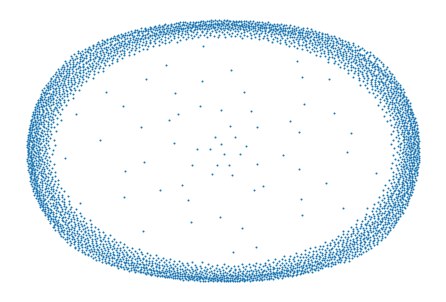

In [105]:
nx.draw_spring(G_gene, with_labels=False, node_size = 1) # draw it pretty
plt.show()

In [106]:
summarystats(G_gene)

number of nodes, n  = 3823
number of edges, m  = 0
mean degree,    <k> =  0.00
mean geodesic distance, <ell> =   nan
clustering coefficient, C     =  0.00


In [38]:
summarystats(G)

number of nodes, n  = 6429
number of edges, m  = 7029
mean degree,    <k> =  2.19
mean geodesic distance, <ell> =  1.75
clustering coefficient, C     =  0.00


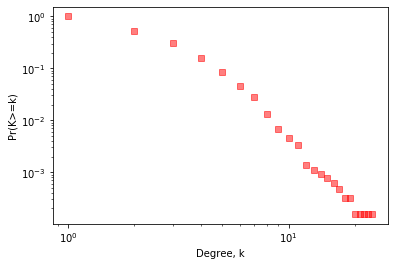

In [39]:
plotDegsCCDF(G.degree())